## Random Forest/Feature Importance

In [1]:
import numpy as np
import pandas as pd
import warnings

from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

#regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
pd.set_option('precision', 3)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("carbi.data.csv")
df = df.iloc[: , 1:]
df.dtypes

cylinders          int64
displayments     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
cluster            int64
mpg              float64
origin_1           int64
origin_2           int64
origin_3           int64
origin             int64
car name          object
brand             object
mpg_scaled       float64
cylinders_str      int64
origin_str         int64
dtype: object

In [3]:
def RandomForReg(source,target):


    if len(source.values.shape)==1:
        X = source.values.reshape(-1,1)
    
    else:
        X = source.values 

    y = target.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=10)  #
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test) 
    importance = model.feature_importances_
    
    print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
    print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}') 
    print('R2 = ',r2_score(y_test,pred_test))
    
    # summarize feature importance
    for i,v in enumerate(importance):
	    print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

Mean Squared Error: 14.356440000000001
Root Mean Squared Error: 3.788989311148819
Mean Absolute Error: 2.7967500000000003
R2 =  0.7329851297818075
Feature: 0, Score: 0.16284
Feature: 1, Score: 0.22340
Feature: 2, Score: 0.43793
Feature: 3, Score: 0.11498
Feature: 4, Score: 0.06086


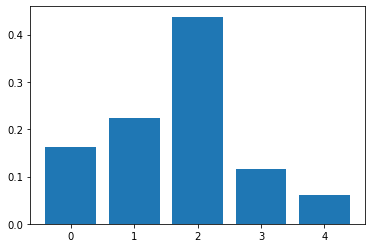

In [4]:
RandomForReg(df[['weight','horsepower','displayments','cylinders','cluster']],df['mpg'])

Mean Squared Error: 16.25589355
Root Mean Squared Error: 4.031859812791114
Mean Absolute Error: 3.0352749999999995
R2 =  0.6976572669454264
Feature: 0, Score: 0.26932
Feature: 1, Score: 0.24562
Feature: 2, Score: 0.06298
Feature: 3, Score: 0.42207


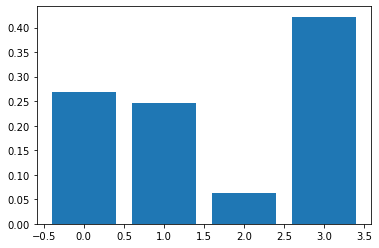

In [5]:
RandomForReg(df[['weight','horsepower','cylinders','cluster']],df['mpg'])

Mean Squared Error: 13.469452500000003
Root Mean Squared Error: 3.670075271707653
Mean Absolute Error: 2.72525
R2 =  0.74948217585992
Feature: 0, Score: 0.26284
Feature: 1, Score: 0.22378
Feature: 2, Score: 0.51338


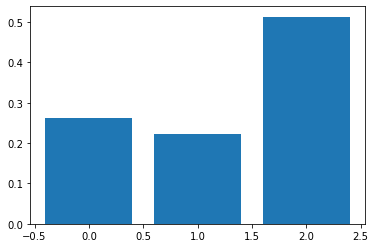

In [7]:
RandomForReg(df[['weight','horsepower','displayments']],df['mpg'])

Mean Squared Error: 12.858226250000001
Root Mean Squared Error: 3.585836896736939
Mean Absolute Error: 2.671625
R2 =  0.7608503491548109
Feature: 0, Score: 0.15201
Feature: 1, Score: 0.23581
Feature: 2, Score: 0.43448
Feature: 3, Score: 0.17770


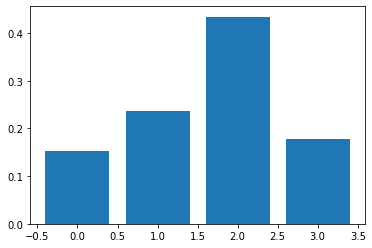

In [15]:
RandomForReg(df[['weight','horsepower','displayments','cluster']],df['mpg'])